In [169]:
# Imports
from geopy.geocoders import Nominatim
import requests
import json
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [170]:
# Get latitude and longitude

city = input("Get rain predictions of which city? ")

# Initialize Nominatim API
geolocator = Nominatim(user_agent="app")

location = geolocator.geocode(city.capitalize())

while location == None:
    city = input("Invalid input. Please try again: ")
    location = geolocator.geocode(city.capitalize())

lat = location.latitude
lon = location.longitude
print(lat,lon)

51.5073359 -0.12765


In [171]:
# Get precipitation data from open-meteo.com
api_url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=precipitation_probability,precipitation"
response = requests.get(api_url).text
data = json.loads(response)

rainfall_amount = data["hourly"]["precipitation"]
rainfall_probability = data["hourly"]["precipitation_probability"]
old_rainfall_time = data["hourly"]["time"]
rainfall_time = []

for time in old_rainfall_time:
    rainfall_time.append(time[-5:])


In [172]:
# Generate DataFrame from data
rainfall = pd.DataFrame(list(zip(rainfall_time, rainfall_amount, rainfall_probability)), columns=["Time", "Precipitation (mm)", "Precipitation Probability (%)"])
rainfall.head(15)

,Time,Precipitation (mm),Precipitation Probability (%)
0,00:00,0.0,0
1,01:00,0.0,0
2,02:00,0.0,0
3,03:00,0.0,0
4,04:00,0.0,5
5,05:00,0.0,11
6,06:00,0.0,16
7,07:00,0.0,29
8,08:00,0.1,42
9,09:00,0.3,55


Text(0.5, 1.0, 'Precipitation Probability for the whole day')

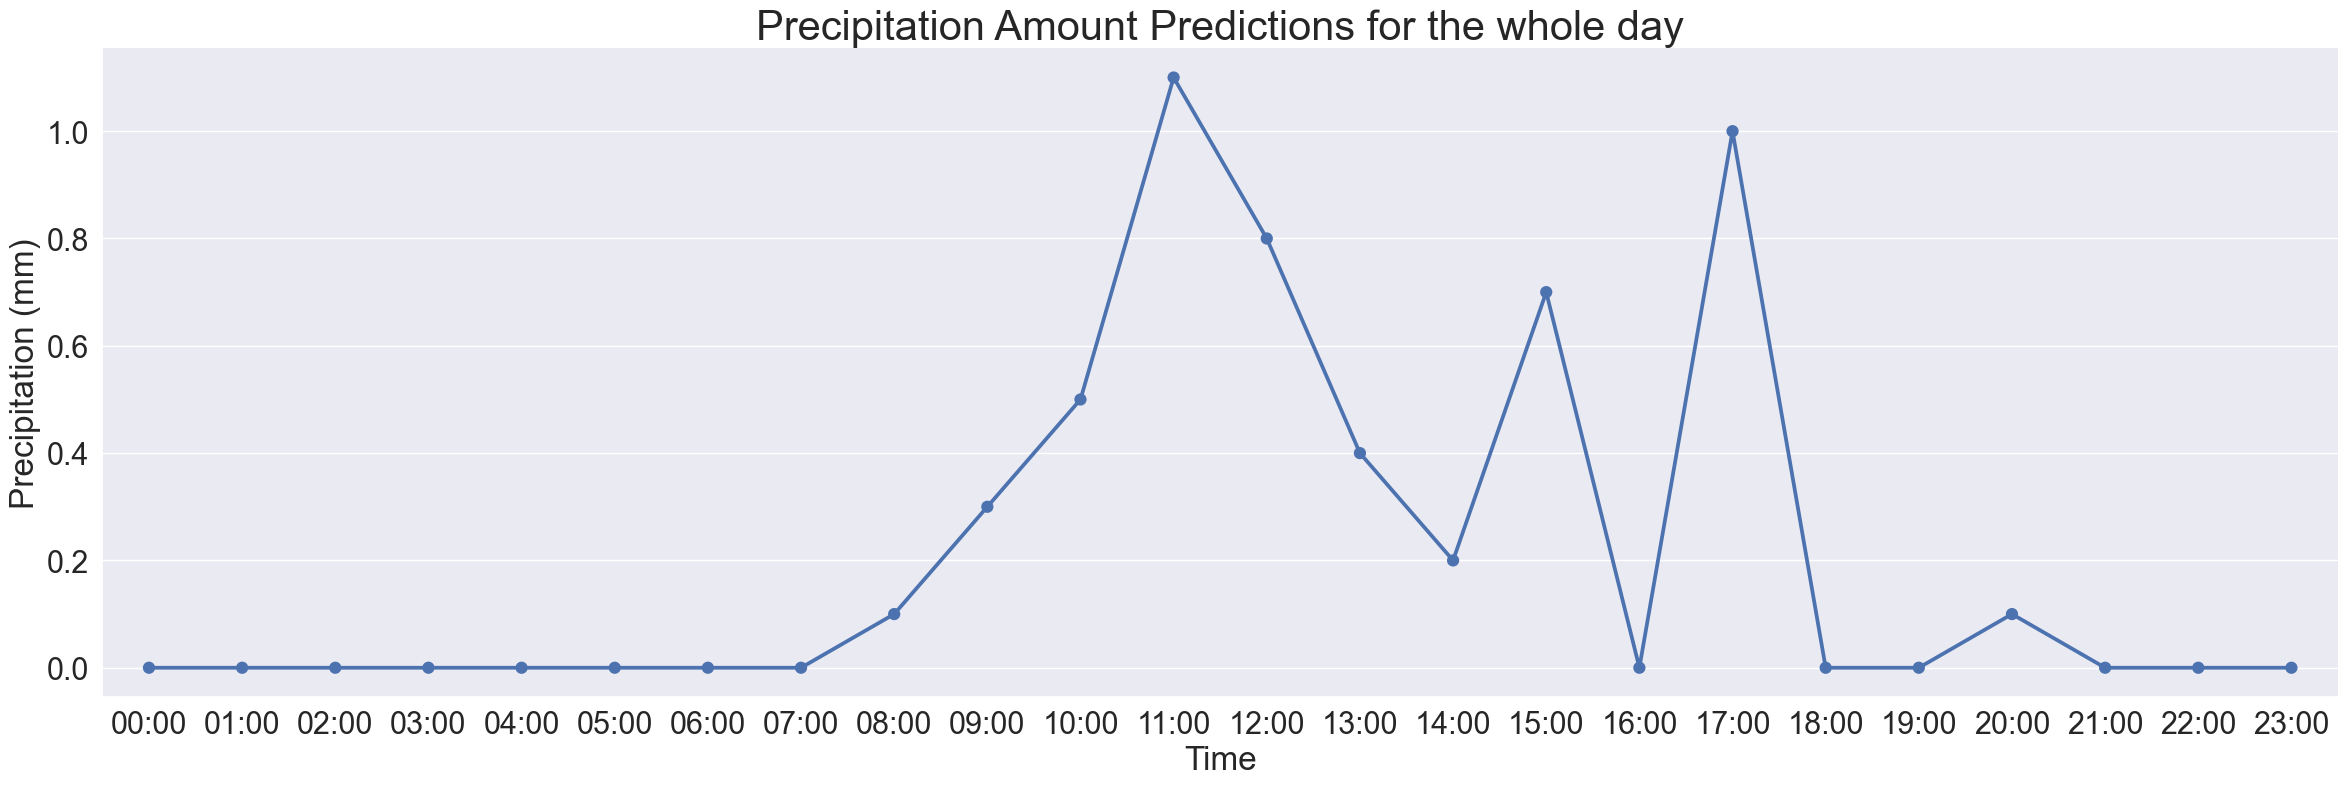

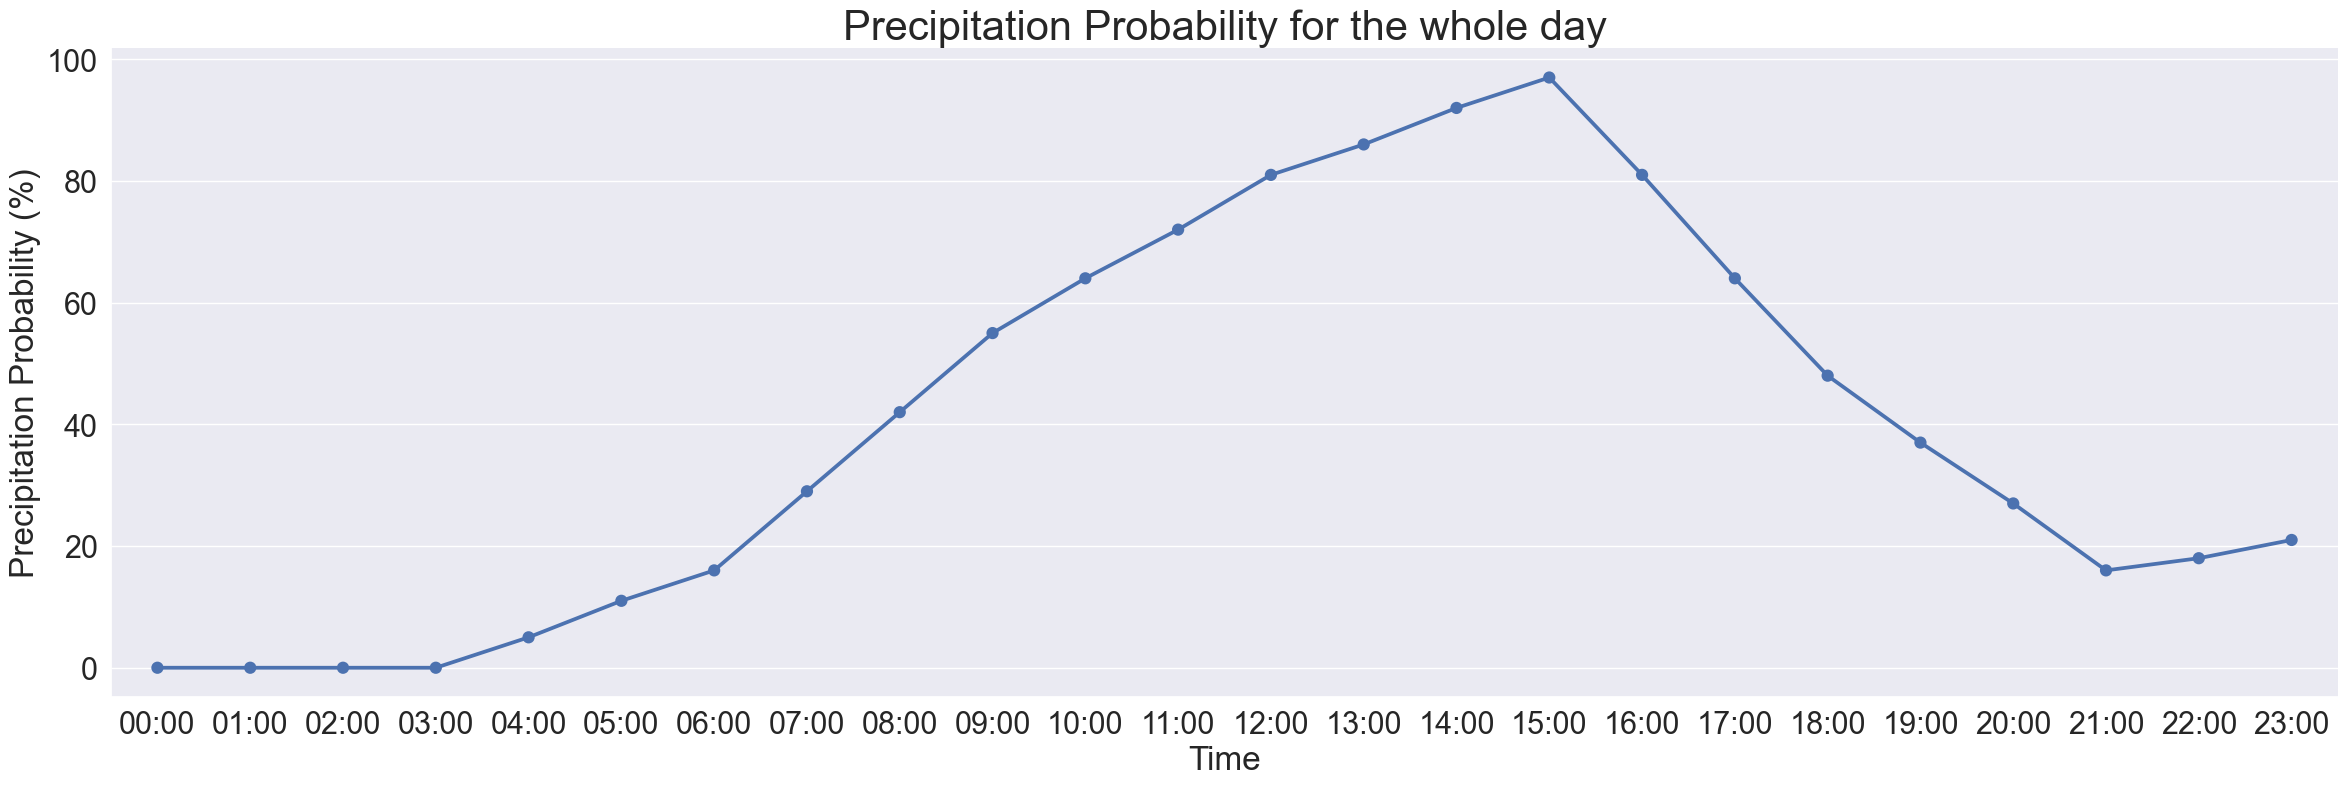

In [173]:
# Bar Chart for Precipitation Amount Predictions for the whole day.
sb.catplot(x='Time', y='Precipitation (mm)', data=rainfall.head(24), kind='point', height=8, aspect=3)

plt.title("Precipitation Amount Predictions for the whole day", fontsize=30)


# Bar Chart for Precipitation Probability for the whole day.
sb.catplot(x='Time', y='Precipitation Probability (%)', data=rainfall.head(24), kind='point', height=8, aspect=3)

plt.title("Precipitation Probability for the whole day", fontsize=30)